In [1]:
import pandas as pd

In [2]:
#Read the csv file
df=pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#understand the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
#check for null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
#statistically describing the dataframe
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
#find the number of rows and columns in the dataset
df.shape

(1372, 5)

### There are 1372 rows and 5 columns in the dataset

In [7]:
#total number of genuine and counterfeit notes present
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### The above indicates that there are 762 genuine notes and 610 counterfeit notes in the dataset 

## Exploratory Data Analysis 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

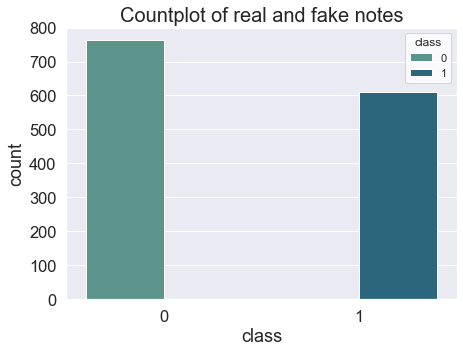

In [9]:
#Let's plot a countplot for the above
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
plt.title('Countplot of real and fake notes',fontsize=20)
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="class",palette='crest',hue='class')
plt.show()

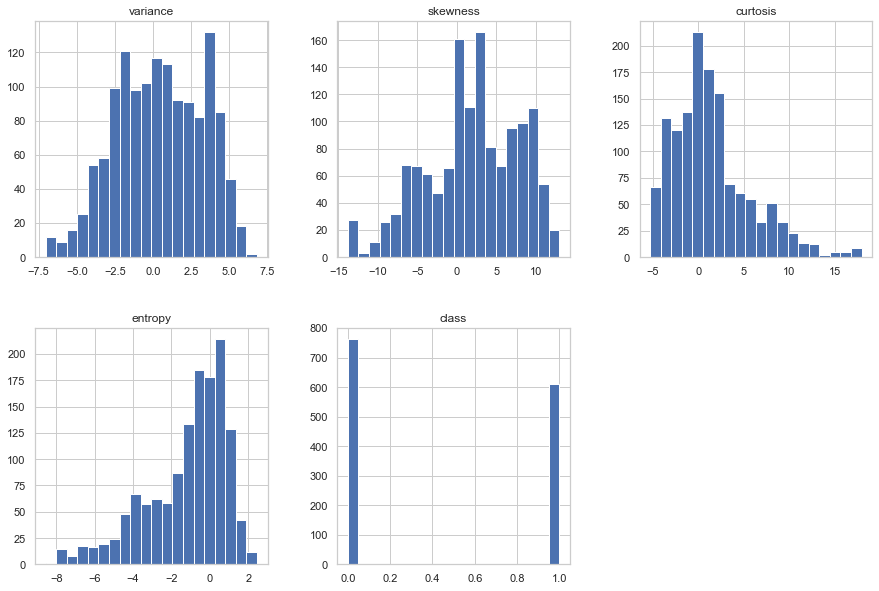

In [10]:
# Check for distribution of data
df.hist(bins=20, figsize=(15,10), layout=(2,3));

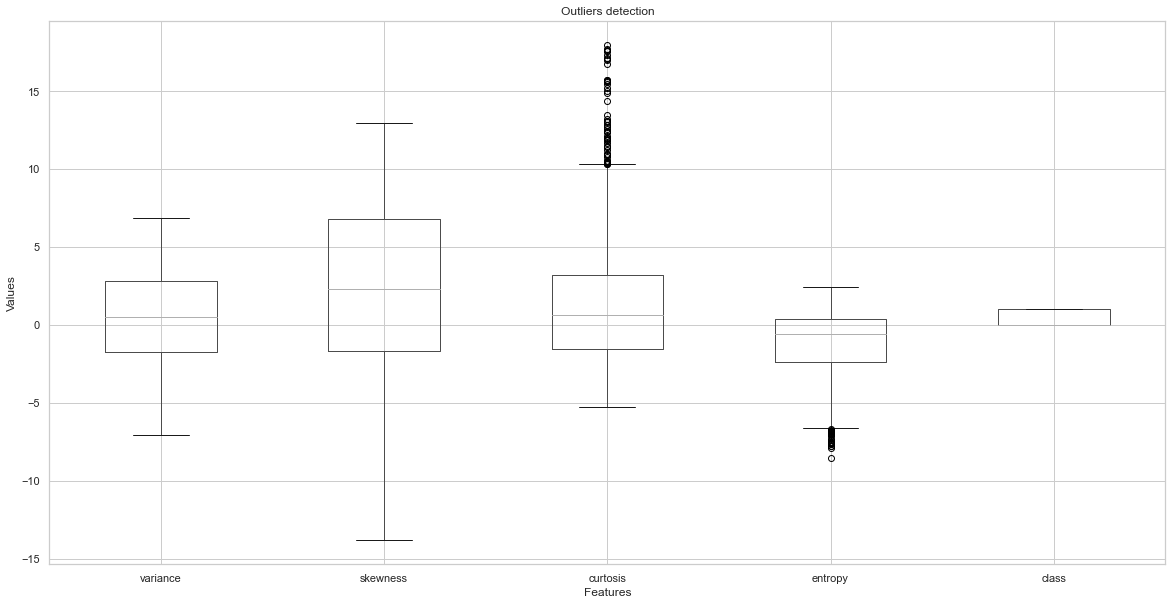

In [11]:
# Check for outliers
graph = df.boxplot(figsize=(20,10))
graph.set_xlabel('Features')
graph.set_ylabel('Values')
graph.set_title('Outliers detection')
plt.show()

### curtosis and entropy has outliers 

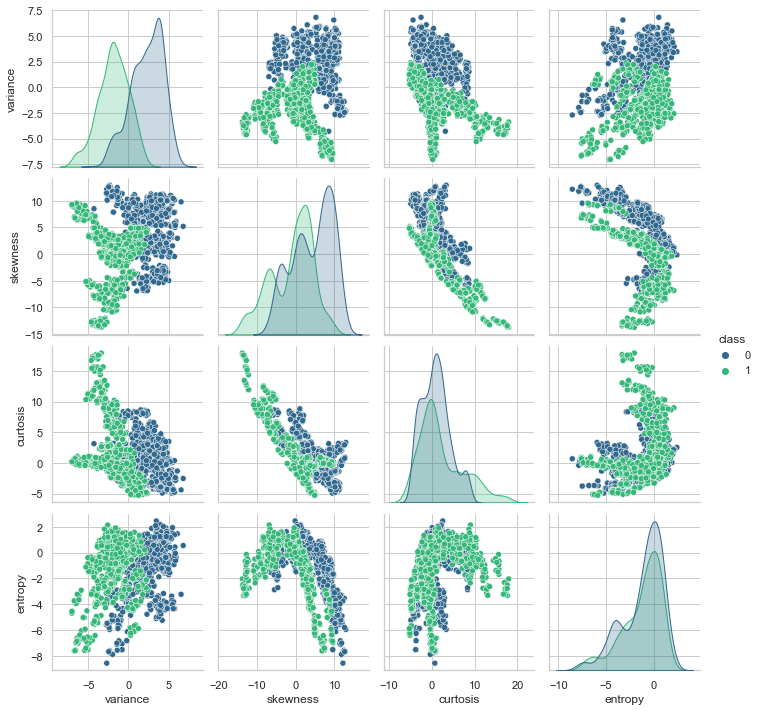

In [12]:
#relationship between pairs of variables in the dataset
sns.pairplot(df, hue="class", palette="viridis")

In [13]:
#dividing the dataset into target set and feature set
x = df.drop('class', axis = 1)
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [15]:
#apply regular standard scalar
to_std = ['variance','skewness']
#since outliers are detected we apply powertransformer
to_log = ['curtosis','entropy']

In [16]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [17]:
#normalise the data with StandardScaler
scaler = StandardScaler()

#scale the train and test data
scaler_xtrain = pd.DataFrame(scaler.fit_transform(x_train[to_std]))
scaler_xtest = pd.DataFrame(scaler.transform(x_test[to_std]))

#assign scaled data to original dataframe
scaler_xtrain.index = x_train.index
scaler_xtest.index = x_test.index
x_train[to_std] = scaler_xtrain
x_test[to_std] = scaler_xtest

In [18]:
# normalise the data with PowerTrasformer
log = PowerTransformer()

log_xtrain = pd.DataFrame(log.fit_transform(x_train[to_log]))
log_xtest = pd.DataFrame(log.transform(x_test[to_log]))

log_xtrain.index = x_train.index
log_xtest.index = x_test.index

x_train[to_log] = log_xtrain
x_test[to_log] = log_xtest

In [19]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

## DecisionTree Classifier 

In [20]:
#Building an empty model or creation of model
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [21]:
#Train the model
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
#Make predictions using hte predic function
dt_pred=classifier.predict(x_test)

In [23]:
#Finding the accuracy of the model
d_tree=accuracy_score(y_test,dt_pred)
print('Decision Tree')
print(f'Accuracy:{d_tree*100:.2f}')
print('Classification Report\n',classification_report(y_test,dt_pred))

Decision Tree
Accuracy:96.36
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       153
           1       0.97      0.95      0.96       122

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [24]:
cm = confusion_matrix(y_test, dt_pred)
cm

array([[149,   4],
       [  6, 116]], dtype=int64)

## KNeighbors Classifier 

In [25]:
#buiding and training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
#Make predictions using hte predic function
knn_pred=knn.predict(x_test)

In [27]:
#Finding the accuracy of the model
knn_model=accuracy_score(y_test,knn_pred)
print('KNeighbors Classifier')
print(f'Accuracy:{knn_model*100:.2f}')
print('Classification Report\n',classification_report(y_test,knn_pred))

KNeighbors Classifier
Accuracy:100.00
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [28]:
cm = confusion_matrix(y_test,knn_pred)
cm

array([[153,   0],
       [  0, 122]], dtype=int64)

## Logistic Regression 

In [29]:
#creation of model and training the model
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=42)

In [30]:
lr.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [31]:
lr_pred=lr.predict(x_test)

In [32]:
#Finding the accuracy of the model
lr_model=accuracy_score(y_test,lr_pred)
print('Logistic Regression')
print(f'Accuracy:{lr_model*100:.2f}')
print('Classification Report\n',classification_report(y_test,lr_pred))

Logistic Regression
Accuracy:99.64
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [33]:
cm = confusion_matrix(y_test, lr_pred)
cm

array([[152,   1],
       [  0, 122]], dtype=int64)

## RandomForest Classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
rfc_pred=rfc.predict(x_test)

In [36]:
#Finding the accuracy of the model
rfc_model=accuracy_score(y_test,rfc_pred)
print('RandomForest Classifier')
print(f'Accuracy:{rfc_model*100:.2f}')
print('Classification Report\n',classification_report(y_test,rfc_pred))

RandomForest Classifier
Accuracy:99.27
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [37]:
cm = confusion_matrix(y_test, rfc_pred)
cm

array([[151,   2],
       [  0, 122]], dtype=int64)

## GradientBoosting Classifier 

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [39]:
gbc_pred=gbc.predict(x_test)

In [40]:
gbc_model=accuracy_score(y_test,gbc_pred)
print('GradientBoosting Classifier')
print(f'Accuracy:{gbc_model*100:.2f}')
print('Classification Report\n',classification_report(y_test,gbc_pred))

GradientBoosting Classifier
Accuracy:99.27
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [41]:
cm = confusion_matrix(y_test, gbc_pred)
cm

array([[151,   2],
       [  0, 122]], dtype=int64)